In [1]:
import os
import keras

Using TensorFlow backend.


In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4286 - accuracy: 0.5008 - val_loss: 1.5931 - val_accuracy: 0.4442
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4116 - accuracy: 0.5024 - val_loss: 1.5802 - val_accuracy: 0.4635
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4128 - accuracy: 0.8515 - val_loss: 2.1904 - val_accuracy: 0.5197
Epoch 48/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.4017 - accuracy: 0.8546 - val_loss: 2.1838 - val_accuracy: 0.5297
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.3643 - accuracy: 0.8687 - val_loss: 2.2964 - val_accuracy: 0.5228
Epoch 50/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.3833 - accuracy: 0.8623 - val_loss: 2.2785 - val_accuracy: 0.5234
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________________________

Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9309 - accuracy: 0.6751 - val_loss: 1.3993 - val_accuracy: 0.5253
Epoch 46/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9180 - accuracy: 0.6793 - val_loss: 1.3439 - val_accuracy: 0.5373
Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9084 - accuracy: 0.6846 - val_loss: 1.3672 - val_accuracy: 0.5253
Epoch 48/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.8988 - accuracy: 0.6867 - val_loss: 1.3833 - val_accuracy: 0.5270
Epoch 49/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.8861 - accuracy: 0.6912 - val_loss: 1.3477 - val_accuracy: 0.5358
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.8734 - accuracy: 0.6951 - val_loss: 1.3763 - val_accuracy: 0.5313
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5934 - accuracy: 0.4459 - val_loss: 1.6017 - val_accuracy: 0.4424
Epoch 44/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5887 - accuracy: 0.4475 - val_loss: 1.5981 - val_accuracy: 0.4457
Epoch 45/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5846 - accuracy: 0.4481 - val_loss: 1.5947 - val_accuracy: 0.4456
Epoch 46/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5802 - accuracy: 0.4502 - val_loss: 1.5929 - val_accuracy: 0.4446
Epoch 47/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5764 - accuracy: 0.4511 - val_loss: 1.5906 - val_accuracy: 0.4434
Epoch 48/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5719 - accuracy: 0.4534 - val_loss: 1.5833 - val_accuracy: 0.4501
Epoch 49/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5677 - accuracy: 0.4550 - val_

Epoch 41/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9574 - accuracy: 0.3176 - val_loss: 1.9564 - val_accuracy: 0.3195
Epoch 42/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9537 - accuracy: 0.3192 - val_loss: 1.9528 - val_accuracy: 0.3204
Epoch 43/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9502 - accuracy: 0.3200 - val_loss: 1.9494 - val_accuracy: 0.3221
Epoch 44/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.9467 - accuracy: 0.3209 - val_loss: 1.9460 - val_accuracy: 0.3237
Epoch 45/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9434 - accuracy: 0.3225 - val_loss: 1.9428 - val_accuracy: 0.3244
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9401 - accuracy: 0.3244 - val_loss: 1.9396 - val_accuracy: 0.3251
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9370 - accuracy: 0.3249 

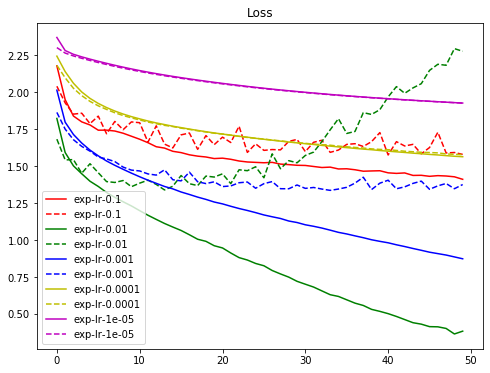

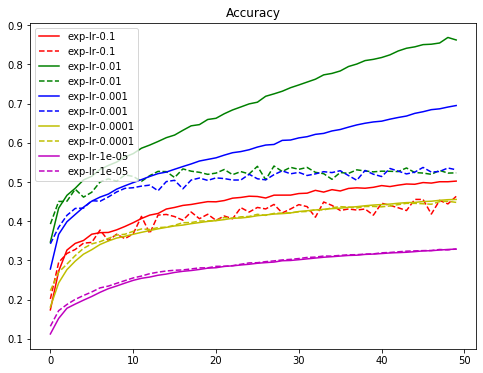

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
train, test = keras.datasets.cifar10.load_data()

In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [ ]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [ ]:
#設定超參數,不同的 momentum 
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.8, 0.9, 0.99]

In [ ]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()